$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 2 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [76]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [203]:
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer

----------------------------

# `02` Load Data

In [78]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [79]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## `#` Create Test Set

Before exploring the data, let's split the data into training and test sets. You shouldn't touch the test set from this point furthur except for final model evaluation.

Use:
- `random_state` $= 1234$
- `test_size` $= 0.2$

Hint: You can use `sklearn.model_selection.train_test_split` function

In [80]:
X = housing.drop(['median_house_value'], axis=1) 
y = housing['median_house_value']

In [81]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [82]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [83]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=1234)

The data was splitted into 80% training and 20% testing

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Note:` Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).

In [84]:
housing.shape

(20640, 10)

In [85]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


there is missing values in total_bedrooms 

In [86]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


we need to do data rescalling    
median_income is presented as an median, not the real income

In [87]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

the number of housing that is on ISLAND very small =5 

In [88]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

the number of missing value in total_bedrooms=207

In [89]:
housing.duplicated().sum()

0

there is no duplicated instances

In [90]:
print(housing['total_bedrooms'].mean())
print(housing['total_bedrooms'].median())
print(housing['total_bedrooms'].mode())

537.8705525375618
435.0
0    280.0
dtype: float64


we will use median to full null values bescause is more realistic

In [91]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Note:` Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).

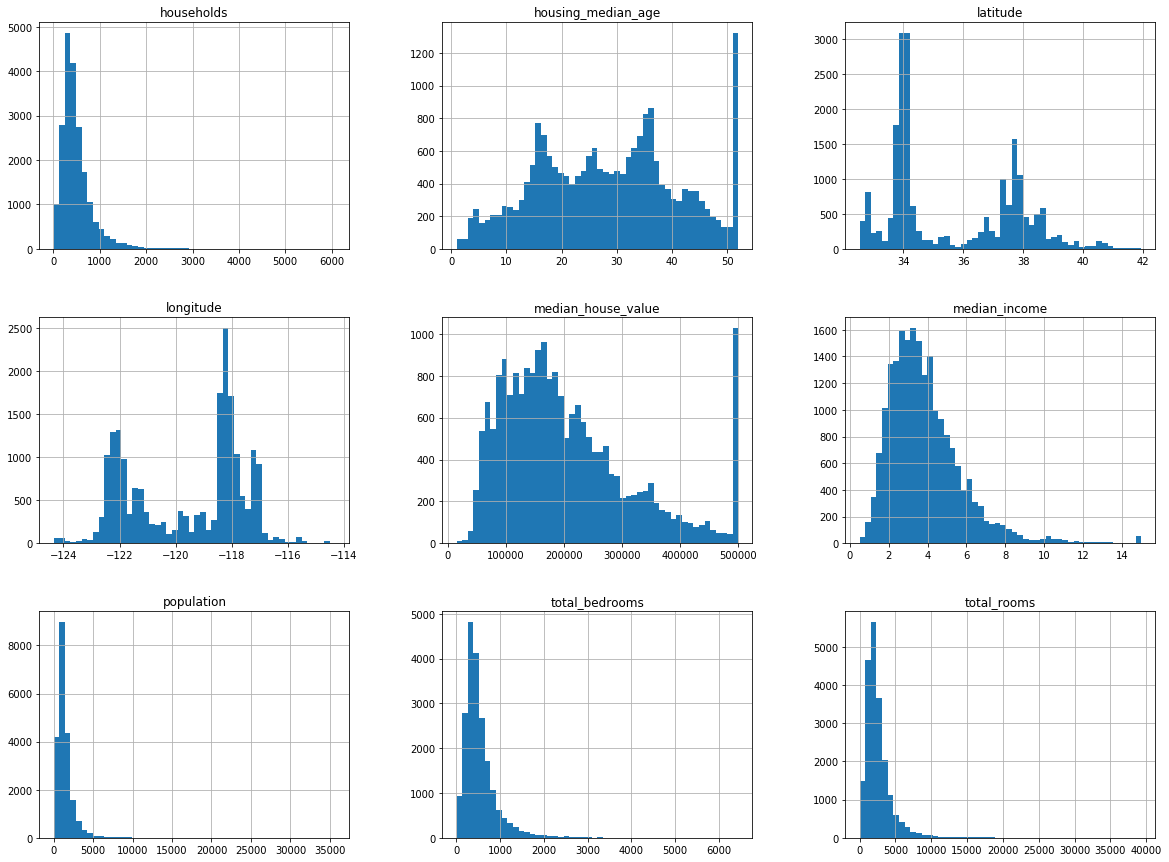

In [92]:
housing.hist(bins=50,figsize=(20,15));

They made outliers not exceed its specified values        
almost features are skewed right such as ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

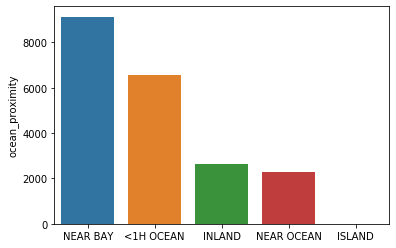

In [93]:
sns.barplot(x=housing['ocean_proximity'].unique(), y=housing['ocean_proximity'].value_counts());

the number of housing that is overlooking NEAR BAY greater than 8000      
but,the number of housing that is overlooking ISLAND =5      
so, there is imbalance in ocean_proximity

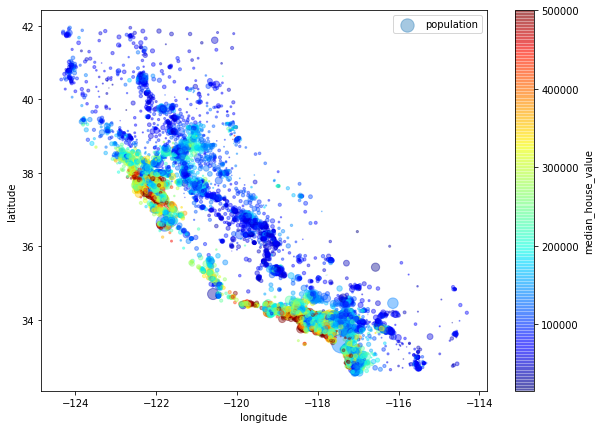

In [94]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,sharex=False)
plt.legend();

almost housing Located away from the OCEAN & ISLANID

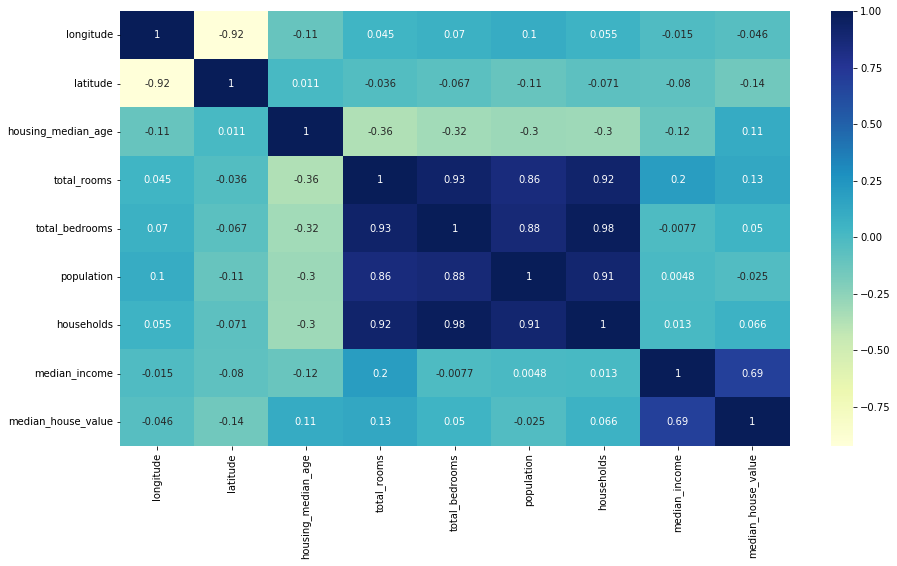

In [95]:
plt.figure(figsize=(15,8))
sns.heatmap(housing.corr(), annot=True, cmap="YlGnBu")

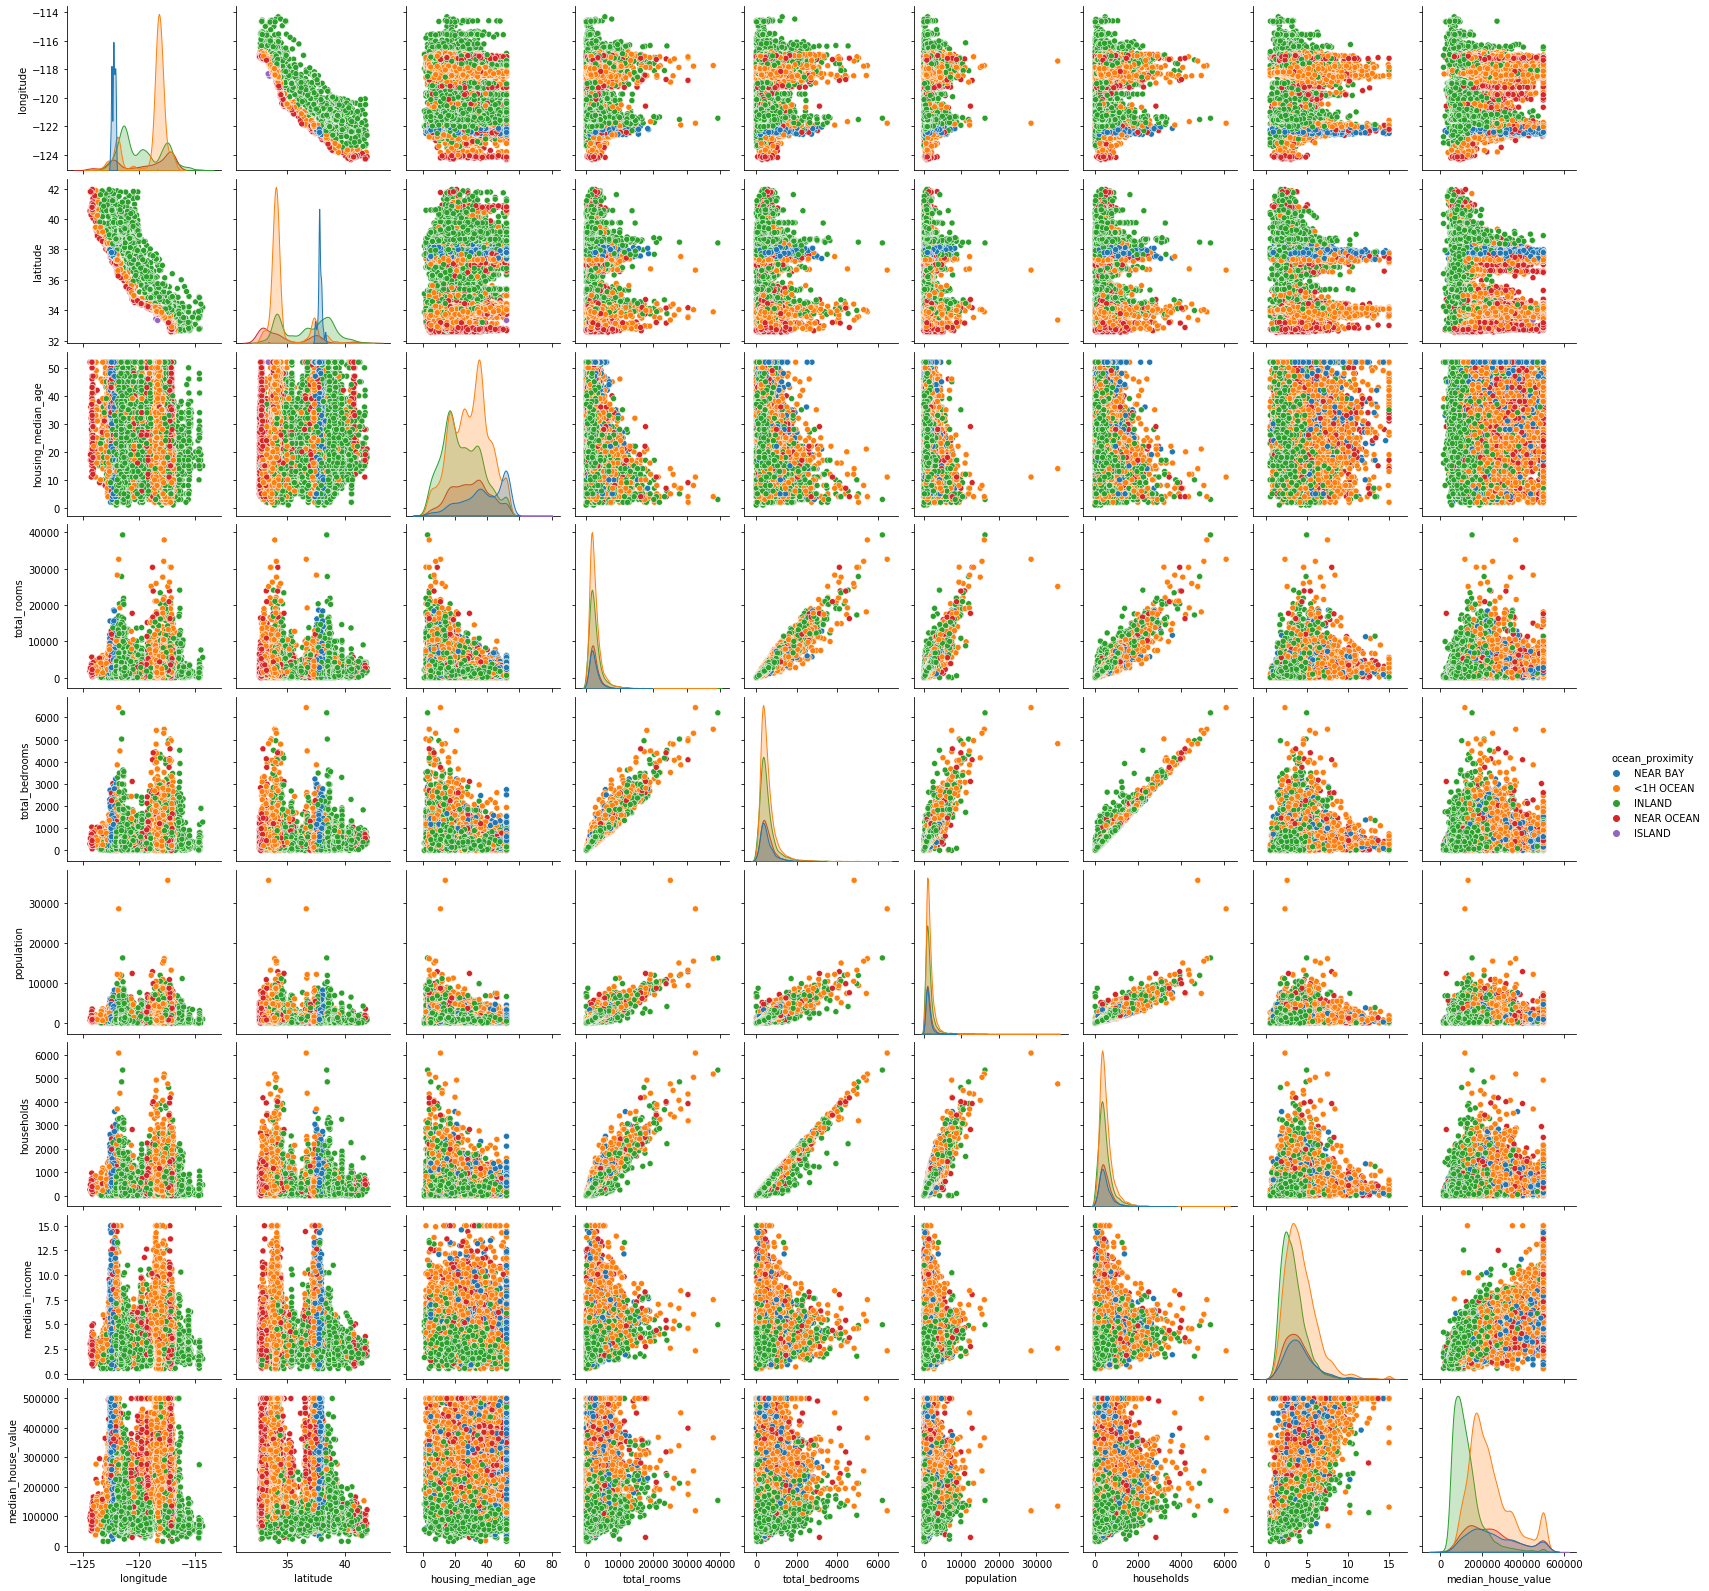

In [96]:
sns.pairplot(data=housing,hue='ocean_proximity')

there is colleration between [total_bedrooms & households ,  
total_bedrooms & population ,total_bedrooms &total_rooms,  
total_rooms & households ,total_rooms & population,  
median_house_value&median_income , households & population]

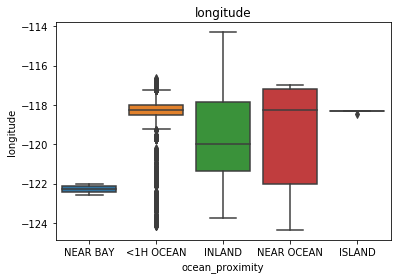

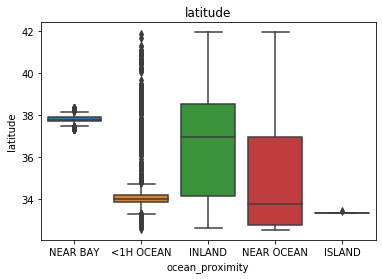

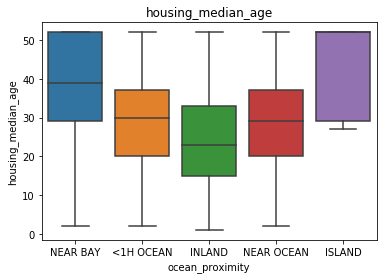

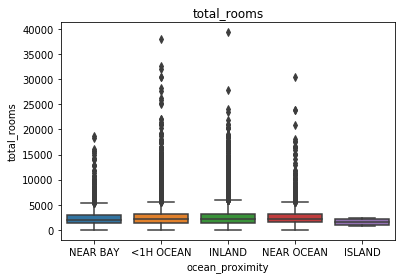

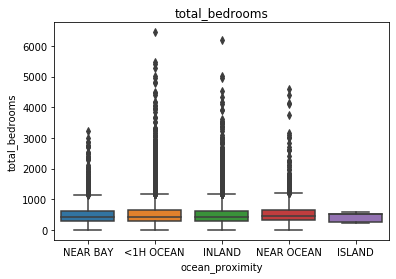

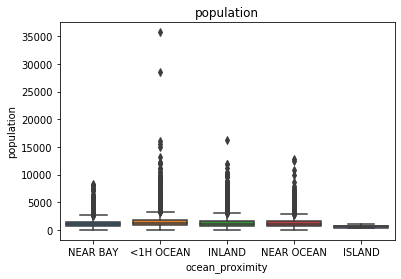

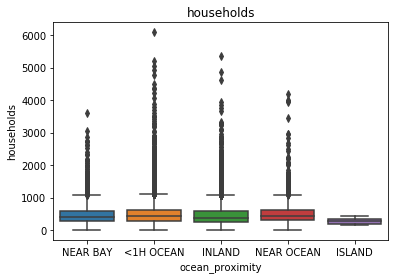

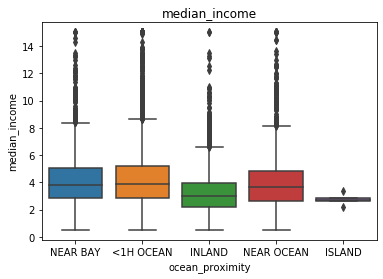

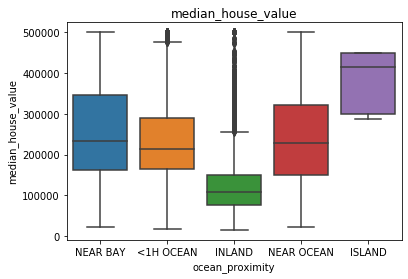

In [97]:
for column in housing.columns[:-1]:
    plt.figure()
    sns.boxplot(x='ocean_proximity', y=column, data=housing)
    plt.title(f'{column}')
    plt.show()

there are outliers in ['total_rooms','total_bedrooms','population', 'households', 'median_income',
       'median_house_value']     
there is different scaling between features


----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, etc. as needed to make sure it's ready for the model.

Hint: It could be helpful to check `sklearn.preprocessing` module.

In [98]:
housing[housing.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND


In [99]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
numeric_imputer = SimpleImputer(strategy='median')
X_train[numeric_features] = numeric_imputer.fit_transform(X_train[numeric_features])

In [100]:
X_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [101]:
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

In [102]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17595,-0.245839,0.625446,-1.317468,-0.384638,-0.374496,-0.020739,-0.266261,-0.701765,INLAND
6073,0.675366,-0.831843,-1.000565,2.777571,2.266144,2.251723,2.594335,0.698830,<1H OCEAN
6251,-0.679054,1.718414,-1.159017,0.221202,0.139359,0.131056,0.148734,-0.174591,INLAND
3161,-1.261653,0.952402,0.663175,-0.299911,-0.131842,-0.201108,-0.088779,-0.681515,NEAR BAY
1887,-0.878233,1.414812,0.504723,-0.907117,-0.997782,-0.974370,-0.952700,-0.436569,INLAND


In [103]:
categorical_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

In [104]:
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_features))
X_train.drop('ocean_proximity', axis=1, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_train_final = pd.concat([X_train, X_train_encoded_df], axis=1)

In [105]:
X_train_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.245839,0.625446,-1.317468,-0.384638,-0.374496,-0.020739,-0.266261,-0.701765,0.0,1.0,0.0,0.0,0.0
1,0.675366,-0.831843,-1.000565,2.777571,2.266144,2.251723,2.594335,0.698830,1.0,0.0,0.0,0.0,0.0
2,-0.679054,1.718414,-1.159017,0.221202,0.139359,0.131056,0.148734,-0.174591,0.0,1.0,0.0,0.0,0.0
3,-1.261653,0.952402,0.663175,-0.299911,-0.131842,-0.201108,-0.088779,-0.681515,0.0,0.0,0.0,1.0,0.0
4,-0.878233,1.414812,0.504723,-0.907117,-0.997782,-0.974370,-0.952700,-0.436569,0.0,1.0,0.0,0.0,0.0


## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [106]:
X_test[numeric_features] = numeric_imputer.transform(X_test[numeric_features])

In [107]:
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [108]:
X_test_encoded = encoder.transform(X_test[categorical_features])

In [109]:
X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_features))
X_test.drop('ocean_proximity', axis=1, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test_final = pd.concat([X_test, X_test_encoded_df], axis=1)

In [110]:
X_test_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.148416,-0.915918,-1.634371,10.790141,8.410983,7.087736,7.469877,0.766856,1.0,0.0,0.0,0.0,0.0
1,1.183273,-1.121433,-1.317468,1.073932,-0.241274,0.610550,0.788192,1.233070,1.0,0.0,0.0,0.0,0.0
2,-0.644197,1.489544,-1.317468,-0.206986,-0.269822,-0.314507,-0.318462,-0.534389,0.0,1.0,0.0,0.0,0.0
3,-0.066577,0.546043,-0.762888,-0.449321,-0.400664,-0.772571,-0.378493,-1.092993,0.0,1.0,0.0,0.0,0.0
4,-1.435935,0.966415,0.821626,-0.254360,-0.129463,0.281958,-0.140980,-0.355307,0.0,0.0,0.0,0.0,1.0


----------------------------

# `05` Normal Equation

Using `sklearn` implementation of the linear regression closed-form solution, i.e. normal equation, to model the data.

Hint: Look for `sklearn.linear_model.LinearRegression` class.

## `i` Model Training

Initializing the model, fitting it to the training data, and get a fitted model.

In [114]:
model1 = LinearRegression()
model1.fit(X_train_final, y_train)

LinearRegression()

## `ii` Model Evaluation

Evaluate model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [120]:
y_pred = model1.predict(X_test_final)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Squared Error (MSE): 4855666772.40
Mean Absolute Error (MAE): 50039.46
R-squared (R2): 0.63
Root Mean Squared Error (RMSE): 69682.61


----------------------

# `06` Linear Regression with Gradient Descent

Using `sklearn` implementation of linear regression to model the data.

Hint: Look for `sklearn.linear_model.SGDRegressor` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- Constant `learning_rate`

In [125]:
model2=SGDRegressor(learning_rate='constant',penalty=None)
model2.fit(X_train_final,y_train)

SGDRegressor(learning_rate='constant', penalty=None)

## `ii` Model Evaluation

Evaluate the baseline model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [126]:
y_pred = model2.predict(X_test_final)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Squared Error (MSE): 4947720341.04
Mean Absolute Error (MAE): 50838.34
R-squared (R2): 0.62
Root Mean Squared Error (RMSE): 70340.03


## `iii` Tune `learning_rate`

Try different `learning_rate` values and evaluate. What is the optimal learning rate?

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [142]:
model3=SGDRegressor(penalty=None)
param_grid = { 'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': np.linspace(0, 10, 100)  }
grid_search = GridSearchCV(model3, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_final, y_train)

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


GridSearchCV(cv=5, estimator=SGDRegressor(penalty=None),
             param_grid={'eta0': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.5252...
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ]),
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive']},
             scoring='neg_mean_sq

In [134]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'eta0': 0.10101010101010101, 'learning_rate': 'invscaling'}


the optimal learning rate is {'eta0': 0.10101010101010101, 'learning_rate': 'invscaling'}

In [143]:
y_pred = grid_search.predict(X_test_final)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Squared Error (MSE): 4899048298.98
Mean Absolute Error (MAE): 50155.47
R-squared (R2): 0.63
Root Mean Squared Error (RMSE): 69993.20


In [147]:
param_dist = { 'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': np.linspace(0, 10, 100)  }
random_search = RandomizedSearchCV(model3, param_distributions=param_dist, n_iter=20, 
                                   scoring='neg_mean_squared_error', random_state=1234, cv=5)

random_search.fit(X_train_final, y_train)


C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-package

RandomizedSearchCV(cv=5, estimator=SGDRegressor(penalty=None), n_iter=20,
                   param_distributions={'eta0': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.3...
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ]),
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                     

In [148]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'learning_rate': 'adaptive', 'eta0': 8.181818181818182}


the optimal learning rate is {'learning_rate': 'adaptive', 'eta0': 8.181818181818182}

In [149]:
y_pred = random_search.predict(X_test_final)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Squared Error (MSE): 4917952908.51
Mean Absolute Error (MAE): 50092.63
R-squared (R2): 0.62
Root Mean Squared Error (RMSE): 70128.12


RandomizedSearchCV is very fast from GridSearchCV

## `iv` Regularization Mode: On

Let's try $l_1$ and $l_2$ regularization. Use default parameters for simplicity. Does regularization made the model generalize better?

Which of the two regularizations performs better?

In [172]:
model_l1 = SGDRegressor( penalty='l1', random_state=1234)

In [173]:
model_l1.fit(X_train_final, y_train)

SGDRegressor(penalty='l1', random_state=1234)

In [174]:
y_pred_l1 = model_l1.predict(X_test_final)

In [175]:
mse_l1 = mean_squared_error(y_test, y_pred_l1)
mae_l1 = mean_absolute_error(y_test, y_pred_l1)
r2_l1 = r2_score(y_test, y_pred_l1)
rmse = np.sqrt(mse)
print("L1 Regularization:")
print(f'Mean Squared Error (MSE): {mse_l1:.2f}')
print(f'Mean Absolute Error (MAE): {mae_l1:.2f}')
print(f'R-squared (R2): {r2_l1:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

L1 Regularization:
Mean Squared Error (MSE): 4877978793.89
Mean Absolute Error (MAE): 49859.68
R-squared (R2): 0.63
Root Mean Squared Error (RMSE): 70128.12


In [168]:
model_l2 = SGDRegressor(penalty='l2', random_state=1234)

In [169]:
model_l2.fit(X_train_final, y_train)

SGDRegressor(random_state=1234)

In [170]:
y_pred_l2 = model_l2.predict(X_test_final)

In [171]:
mse_l2 = mean_squared_error(y_test, y_pred_l2)
mae_l2 = mean_absolute_error(y_test, y_pred_l2)
r2_l2 = r2_score(y_test, y_pred_l2)
rmse = np.sqrt(mse)
print("\nL2 Regularization:")
print(f'Mean Squared Error (MSE): {mse_l2:.2f}')
print(f'Mean Absolute Error (MAE): {mae_l2:.2f}')
print(f'R-squared (R2): {r2_l2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


L2 Regularization:
Mean Squared Error (MSE): 4877592218.82
Mean Absolute Error (MAE): 49857.54
R-squared (R2): 0.63
Root Mean Squared Error (RMSE): 70128.12


L2 is the  regularizations performs better than L1    
yes, regularization made the model generalize better

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [177]:
y_pred_test = model1.predict(X_test_final)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("Test Set Metrics:")
print(f'Mean Squared Error (MSE): {mse_test:.2f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print(f'R-squared (R2): {r2_test:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.2f}')

Test Set Metrics:
Mean Squared Error (MSE): 4855666772.40
Mean Absolute Error (MAE): 50039.46
R-squared (R2): 0.63
Root Mean Squared Error (RMSE): 69682.61


In [178]:
y_pred_test = model2.predict(X_test_final)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("Test Set Metrics:")
print(f'Mean Squared Error (MSE): {mse_test:.2f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print(f'R-squared (R2): {r2_test:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.2f}')

Test Set Metrics:
Mean Squared Error (MSE): 4947720341.04
Mean Absolute Error (MAE): 50838.34
R-squared (R2): 0.62
Root Mean Squared Error (RMSE): 70340.03


In [179]:
y_pred_test = grid_search.predict(X_test_final)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("Test Set Metrics:")
print(f'Mean Squared Error (MSE): {mse_test:.2f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print(f'R-squared (R2): {r2_test:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.2f}')

Test Set Metrics:
Mean Squared Error (MSE): 4899048298.98
Mean Absolute Error (MAE): 50155.47
R-squared (R2): 0.63
Root Mean Squared Error (RMSE): 69993.20


In [180]:
y_pred_test = random_search.predict(X_test_final)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("Test Set Metrics:")
print(f'Mean Squared Error (MSE): {mse_test:.2f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print(f'R-squared (R2): {r2_test:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.2f}')

Test Set Metrics:
Mean Squared Error (MSE): 4917952908.51
Mean Absolute Error (MAE): 50092.63
R-squared (R2): 0.62
Root Mean Squared Error (RMSE): 70128.12


In [181]:
y_pred_test = model_l1.predict(X_test_final)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("Test Set Metrics:")
print(f'Mean Squared Error (MSE): {mse_test:.2f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print(f'R-squared (R2): {r2_test:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.2f}')

Test Set Metrics:
Mean Squared Error (MSE): 4877978793.89
Mean Absolute Error (MAE): 49859.68
R-squared (R2): 0.63
Root Mean Squared Error (RMSE): 69842.53


In [182]:
y_pred_test = model_l2.predict(X_test_final)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("Test Set Metrics:")
print(f'Mean Squared Error (MSE): {mse_test:.2f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print(f'R-squared (R2): {r2_test:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.2f}')

Test Set Metrics:
Mean Squared Error (MSE): 4877592218.82
Mean Absolute Error (MAE): 49857.54
R-squared (R2): 0.63
Root Mean Squared Error (RMSE): 69839.76


model_l2 is the best model

-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

In [202]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


model1 = TransformedTargetRegressor(regressor=LinearRegression())
model2 = TransformedTargetRegressor(regressor=SGDRegressor(penalty=None, random_state=1234))
model3 = TransformedTargetRegressor(regressor=SGDRegressor(penalty='l1', random_state=1234))
model4 = TransformedTargetRegressor(regressor=SGDRegressor(penalty='l2', random_state=1234))


pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model1', model1)
    
])
pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model2', model2)
    
])
pipeline3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model3', model3)
    
])
pipeline4 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model4', model4)
    
])


In [212]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=1234)
pipeline1.fit(X_train, y_train)
y_pred1 = pipeline1.predict(X_test)

pipeline2.fit(X_train, y_train)
y_pred2 = pipeline2.predict(X_test)

pipeline3.fit(X_train, y_train)
y_pred3 = pipeline3.predict(X_test)

pipeline4.fit(X_train, y_train)
y_pred4 = pipeline4.predict(X_test)

mse1 = mean_squared_error(y_test, y_pred1)
mae1 = mean_absolute_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
rmse1 = np.sqrt(mse1)

mse2= mean_squared_error(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
rmse2 = np.sqrt(mse2)

mse3 = mean_squared_error(y_test, y_pred3)
mae3 = mean_absolute_error(y_test, y_pred3)
r2_3= r2_score(y_test, y_pred3)
rmse3 = np.sqrt(mse3)

mse4 = mean_squared_error(y_test, y_pred4)
mae4 = mean_absolute_error(y_test, y_pred4)
r2_4 = r2_score(y_test, y_pred4)
rmse4 = np.sqrt(mse4)
y_pred_all = np.column_stack((y_pred1, y_pred2, y_pred3, y_pred4))


print("Metrics for pipeline1:")
print(f'Mean Squared Error (MSE): {mse1:.2f}')
print(f'Mean Absolute Error (MAE): {mae1:.2f}')
print(f'R-squared (R2): {r2_1:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse1:.2f}')


print("Metrics for pipeline2:")
print(f'Mean Squared Error (MSE): {mse2:.2f}')
print(f'Mean Absolute Error (MAE): {mae2:.2f}')
print(f'R-squared (R2): {r2_2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse2:.2f}')

print("Metrics for pipeline3:")
print(f'Mean Squared Error (MSE): {mse3:.2f}')
print(f'Mean Absolute Error (MAE): {mae3:.2f}')
print(f'R-squared (R2): {r2_3:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse3:.2f}')

print("Metrics for pipeline4:")
print(f'Mean Squared Error (MSE): {mse4:.2f}')
print(f'Mean Absolute Error (MAE): {mae4:.2f}')
print(f'R-squared (R2): {r2_4:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse4:.2f}')


Metrics for pipeline1:
Mean Squared Error (MSE): 4855666772.40
Mean Absolute Error (MAE): 50039.46
R-squared (R2): 0.63
Root Mean Squared Error (RMSE): 69682.61
Metrics for pipeline2:
Mean Squared Error (MSE): 4877978800.27
Mean Absolute Error (MAE): 49859.68
R-squared (R2): 0.63
Root Mean Squared Error (RMSE): 69842.53
Metrics for pipeline3:
Mean Squared Error (MSE): 4877978793.89
Mean Absolute Error (MAE): 49859.68
R-squared (R2): 0.63
Root Mean Squared Error (RMSE): 69842.53
Metrics for pipeline4:
Mean Squared Error (MSE): 4877592218.82
Mean Absolute Error (MAE): 49857.54
R-squared (R2): 0.63
Root Mean Squared Error (RMSE): 69839.76


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$